<a href="https://colab.research.google.com/github/hameed-abiodun/Data_Science_Projects/blob/main/Bank_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Marketing

### Importing All required Libraries

In [25]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns



### Exploring the datasets

In [27]:
# Import data
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bank-additional-full.csv", delimiter=";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [28]:
print(data.shape)
data.info()

(41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   411

The datasest has $21$ columns and $41,188$ row. It can be seen that no missing data ws reported. However, lets take a look at some of the columns to access what if this is a true representation of the dataset. For example, let us explore the "education" column:

In [29]:
data["education"].value_counts()

,count
education,
university.degree,12168
high.school,9515
basic.9y,6045
professional.course,5243
basic.4y,4176
basic.6y,2292
unknown,1731
illiterate,18


It appears there is "unknown" category in the "education" column. Feading through the documentation from the dataset shows that "unknown" was a place holder for missing values in the categorical data. Thus, we replace "unknown" with a missing value using "NaN" from the "numpy" library.

In [30]:
data.replace("unknown", np.NaN, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Next, let us explore the distribution of our target $(y)$.

In [31]:
data["y"].value_counts(normalize=True)

,proportion
y,
no,0.887346
yes,0.112654


Cleary, about $89\%$ of the client do not subcribe to a term deposit, while roughly $11\%$ subscribed. Let us project this value in a bar chat.

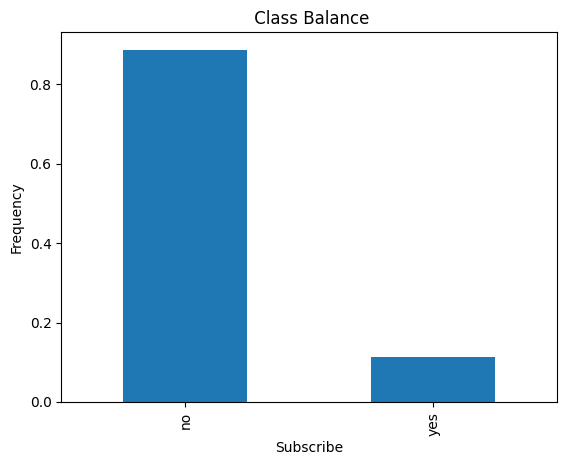

In [32]:
# Plot class balance
data["y"].value_counts(normalize = True).plot(
    kind ="bar",
    xlabel="Subscribe",
    ylabel = "Frequency",
    title = " Class Balance"
);

Next, let us explore some descriptive statistics from the numeric variable.

In [33]:
data.describe(exclude="object")

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


We can suspect some anormalies goin on with the "pdays" column. The $25$th percentile, $50$th percentile, $75$th percentile, and the maximum value all have the same value $(999.0000)$. Thus lets explore the distribution of the column by plotting a box plot of the data in the column.

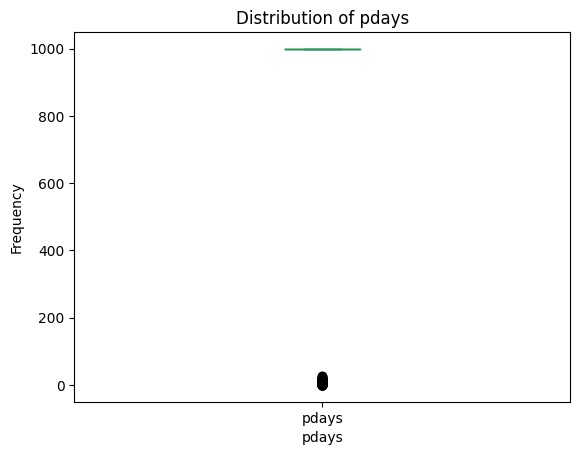

In [34]:
data["pdays"].plot(
    kind="box",
    xlabel = "pdays",
    ylabel="Frequency",
    title = "Distribution of pdays"
);

The boxplot show no meaningful result, so let plot an histogram to see what is going on within the column.

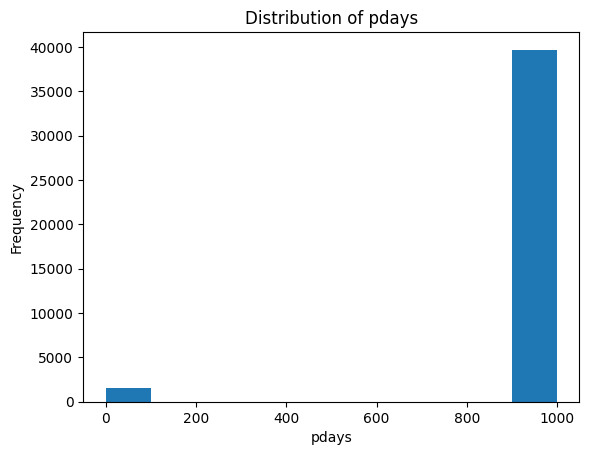

In [35]:
data["pdays"].plot(
    kind="hist",
    xlabel = "pdays",
    ylabel="Frequency",
    title = "Distribution of pdays"
);

This clearly shows that larger percentage of the data have the value between 900 and 1000 (we can conclude 999 based on the result from the descriptive statistics sections). On reading the documentations from the datasets, it appears that the number "999" is a placeholder for client that were not previously contacted. Let compute the actual proprtion of the client that were previosly contacted.

In [36]:
(data["pdays"] < 999).sum() / len(data["pdays"]) * 100

3.6782558026609693

It appears that only about $4\%$ of the partcipant were previosuly contacted from a previous campaign.

Let us investigate the distribution of the numeric variables starting with age of the clients.

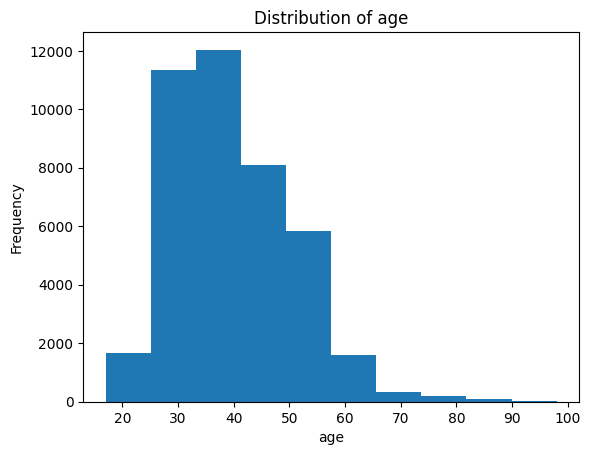

In [37]:
data["age"].plot(
    kind="hist",
    xlabel = "age",
    ylabel="Frequency",
    title = "Distribution of age"
);

We can see that majority of the bank client aged between $20$ years to $60$ years. There are few client whose age goes as high as $90$ years, let us investigate if this would not be an outlier in the age group.

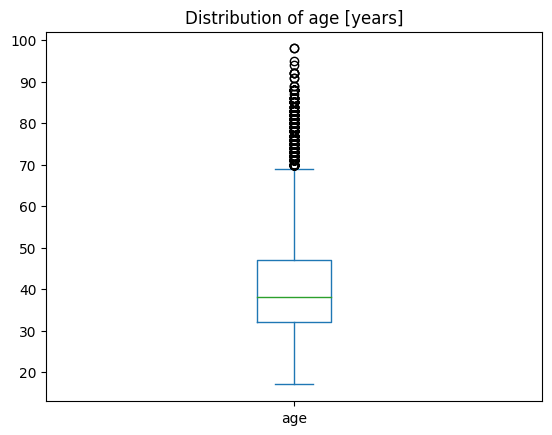

In [38]:
data["age"].plot(
    kind="box",
    title = "Distribution of age [years]"
);

It is obvious that client whose age are above $70$ years are considered outliers. Lets explore duration of last contact with the client ("duration").

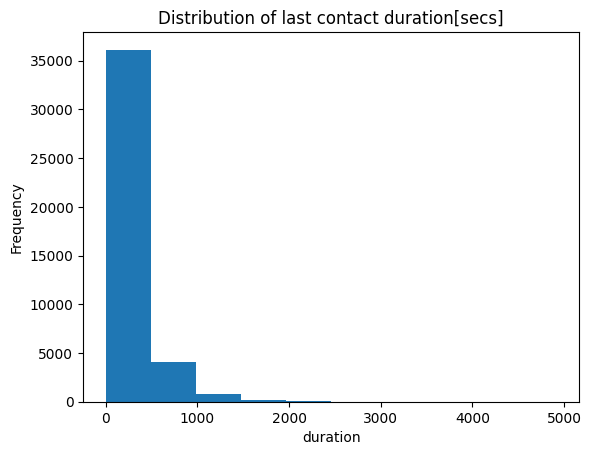

In [39]:
data["duration"].plot(
    kind="hist",
    xlabel = "duration",
    ylabel="Frequency",
    title = "Distribution of last contact duration[secs]"
);

The distribution is right-skewed. Let's examine its box plot.

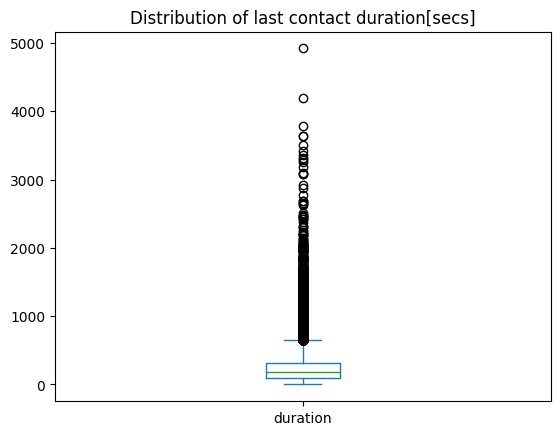

In [40]:
data["duration"].plot(
    kind="box",
    title = "Distribution of last contact duration[secs]"
);

Some of the data point appeared to be outliers. Next, lets explore the number of contacts performed during this campaign ("campaign")

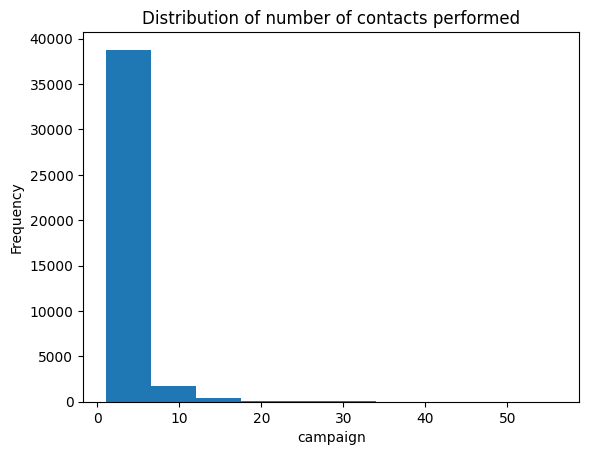

In [41]:
data["campaign"].plot(
    kind="hist",
    xlabel = "campaign",
    ylabel="Frequency",
    title = "Distribution of number of contacts performed"
);

The distribution is similar to that of "duration", we will check to see if the is correlation between this two feature later in the analysis.

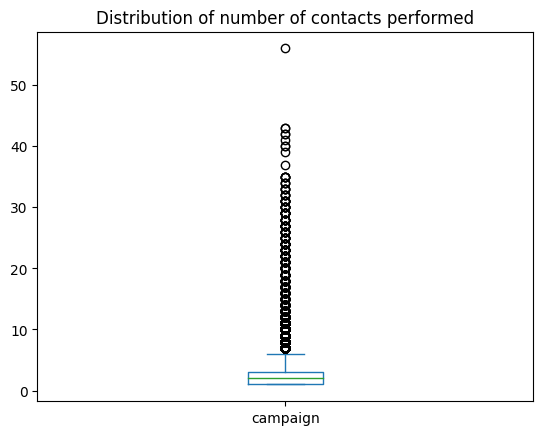

In [42]:
data["campaign"].plot(
    kind="box",
    title = "Distribution of number of contacts performed"
);